In [1]:
# Shuyao Wang 
# 10/15/20

# test the simple code on README 
import sqlite3
import pandas

sqlite_file = 'C:\\Users\\14376\\Desktop\\Classes\\CMSC320\\fall2020\\project2\\lahman2014.sqlite'
conn = sqlite3.connect('lahman2014.sqlite')
salary_query = "SELECT yearID, sum(salary) as total_payroll FROM Salaries WHERE lgID == 'AL' GROUP BY yearID"

team_salaries = pandas.read_sql(salary_query, conn)
team_salaries.head()

,yearID,total_payroll
0,1985,134401120.0
1,1986,157716444.0
2,1987,136088747.0
3,1988,157049812.0
4,1989,188771688.0


In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

# Problem 1
Using SQL compute a relation containing the total payroll and winning percentage (number of wins / number of games * 100) for each team (that is, for each teamID and yearID combination).
I first build the connection to the database, and then performed the queries based on it. I found there are much more query data of win percentages total payrolls. So I decided use inner join to get the data records in both table, which is helpful to eliminate the missing data.

In [3]:
sqlite_file = 'C:\\Users\\14376\\Desktop\\Classes\\CMSC320\\fall2020\\project2\\lahman2014.sqlite'
conn = sqlite3.connect('lahman2014.sqlite')

# query for Salaries 
salary_query = "SELECT teamID, yearID, sum(salary) as total_payroll FROM Salaries GROUP BY teamID, yearID"
# make it to dataframe
team_salaries = pd.read_sql(salary_query, conn)

# query for win percent (wins/games, switch it to float type) 
win_percent_query = "SELECT teamID, yearID , franchID, W as wins, G as games, (W*100.0/G) as winning_percentage \
FROM teams GROUP BY teamID, yearID ORDER BY teamID"

# make it to dataframe
team_table = pd.read_sql(win_percent_query, conn)

# Merge the the dataframe by teams and years by inner merge (deal with the missing data)
result = team_salaries.merge(team_table, how = "inner", \
                           left_on = ["teamID", "yearID"], right_on = ["teamID", "yearID"])

# print table
result

,teamID,yearID,total_payroll,franchID,wins,games,winning_percentage
0,ATL,1985,14807000.0,ATL,66,162,40.740741
1,BAL,1985,11560712.0,BAL,83,161,51.552795
2,BOS,1985,10897560.0,BOS,81,163,49.693252
3,CAL,1985,14427894.0,ANA,90,162,55.555556
4,CHA,1985,9846178.0,CHW,85,163,52.147239
...,...,...,...,...,...,...,...
853,SLN,2014,120693000.0,STL,90,162,55.555556
854,TBA,2014,72689100.0,TBD,77,162,47.530864
855,TEX,2014,112255059.0,TEX,67,162,41.358025
856,TOR,2014,109920100.0,TOR,83,162,51.234568


# Problem 2
Write code to produce plots that illustrate the distribution of payrolls across teams conditioned on time (from 1990-2014).
For this I first create the dataframe that only contain the team information between 1990-2014 without missing data, then extract the yearID, teamID, and total payroll to build the graph 

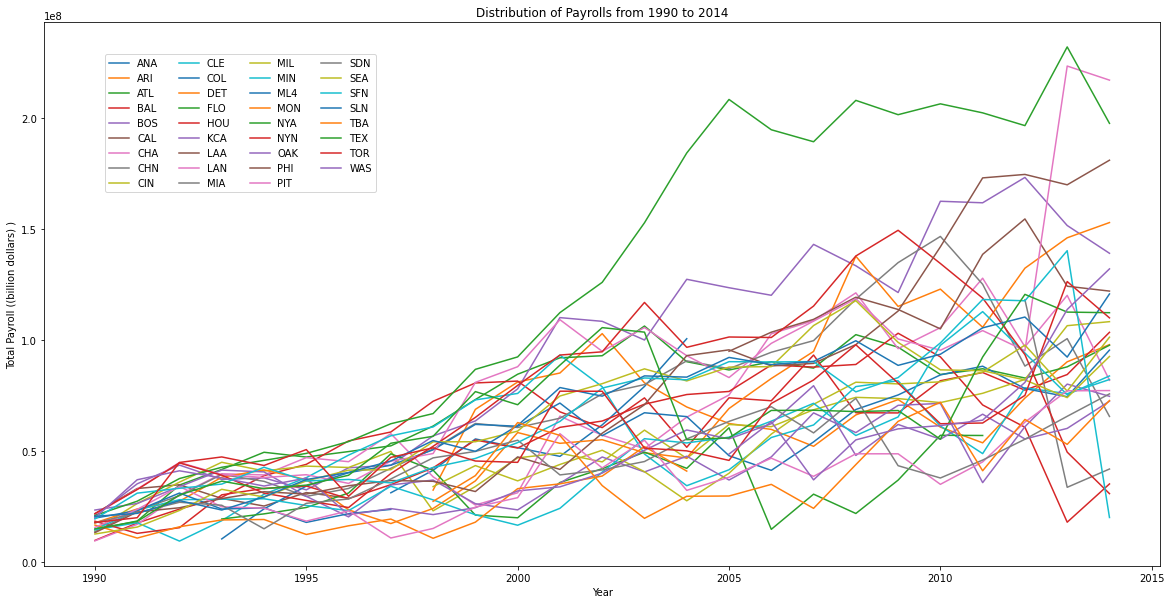

In [4]:
# make new query for Salaries and winning percentage that between 1990 - 2014
salary_query_2014 = "SELECT teamID, yearID, sum(salary) as total_payroll FROM Salaries \
WHERE yearID >= 1990 AND yearID <= 2014 GROUP BY teamID, yearID ORDER BY teamID"

win_percent_query_2014 = "SELECT teamID, yearID, W as wins, G as games, \
CAST(W AS FLOAT)*100 / (G) as win_percentage, franchID FROM teams \
WHERE yearID >= 1990 AND yearID <= 2014 GROUP BY teamID, yearID ORDER BY teamID"

team_salaries_2014 = pd.read_sql(salary_query_2014, conn)
team_table_2014 = pd.read_sql(win_percent_query_2014, conn)


# Merge the the dataframe by teams and years by inner merge (deal with the missing data)
result_2014 = team_salaries_2014.merge(team_table, how = "inner", \
                           left_on = ["teamID", "yearID"], right_on = ["teamID", "yearID"])


# Extract the necessary team data (yearID, teamID, total Payroll) from the entire table
salaries = result_2014.pivot(index='yearID', columns='teamID', values='total_payroll')

# size of figure 
plt.figure(figsize = (20, 10))

# for each team in the table, draw the line of it's salaries, and specify the location of each team's location  
for col in (salaries.columns):
    plt.plot(salaries[col], label=col)
    plt.legend(col)


# add proper label to make the graph more readable
plt.title("Distribution of Payrolls from 1990 to 2014")
plt.xlabel("Year")
plt.ylabel("Total Payroll ((billion dollars) )")
plt.legend(bbox_to_anchor=(0.05,0.95), loc=2, ncol=4)
plt.show()


# Question 1 
What statements can you make about the distribution of payrolls conditioned on time based on these plots?

When I watch the graph above, and found that the salaries for each team are trend to increase over time, and the diff between min salary and max salary is increaing. To prove that, below I did some calculation from the dataframe which made the graph. I found the min salary in 1990 is 9,491,500 and the min salary in 2014 is 20,000,000 (> 1990), and the max salary in 1990 is 23,361,084 and the max salary in 2014 is 217,014,600 (> 1990). The gap between max and min salary in 1990 is 13,869,584, and The gap between max and min salary in 2014 is 197,014,600 (> 1990). The different between mean and avg of total payroll in 1990 is 518,432.423, and the different between mean and avg of total payroll in 1990 is 3,293,765.5333333313 (> 1990).

Base on that the statement I make is there is an increase in spread and central tendency over time. 

In [5]:
# find the min and max salaries on year 1990
year_1990 = result_2014.loc[result_2014['yearID'] == 1990]
min_1990 = year_1990['total_payroll'].min()
max_1990 = year_1990['total_payroll'].max()
mean_1990 = year_1990['total_payroll'].mean()
median_1990 = year_1990['total_payroll'].median()

# find the min and max salaries on year 2014
year_2014 = result_2014.loc[result_2014['yearID'] == 2014]
min_2014 = year_2014['total_payroll'].min()
max_2014 = year_2014['total_payroll'].max()
mean_2014 = year_2014['total_payroll'].mean()
median_2014 = year_2014['total_payroll'].median()


# print the value 
print(str(min_1990))
print(str(min_2014))

print(str(max_1990))
print(str(max_2014))

print(str(mean_1990 - median_1990))
print(str(mean_2014 - median_2014))

print(str(max_1990 - min_1990))
print(str(max_2014 - min_2014))

9491500.0
20000000.0
23361084.0
217014600.0
-518432.42307692394
3293765.5333333313
13869584.0
197014600.0


# Problem 3
Write code to produce plots that specifically show at least one of the statements you made in Question 1. 
I choose to show there is a trend for payrolls to increase over time by showing the graph of the mean salaries in each year.  The graph shown that there is an increase in central tendency.

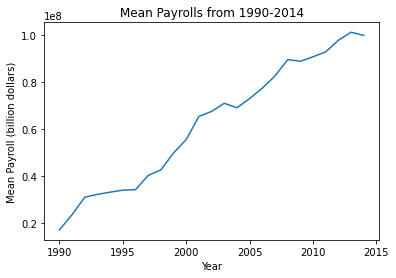

In [6]:
# calculat the mean payroll
salary_mean = salaries.mean(axis=1)

# draw graph
plt.plot(salary_mean)

# add necessary labels 
plt.title("Mean Payrolls from 1990-2014")
plt.xlabel("Year")
plt.ylabel("Mean Payroll (billion dollars)")
plt.show()

# Problem 4
Write code to discretize year into five time periods (you can use pandas.cut to accomplish this) and then make a scatterplot showing mean winning percentage (y-axis) vs. mean payroll (x-axis) for each of the five time periods. I did this by divided the years into 5 consecutive time period, and then for each time period, I can draw the scatterplot between payroll and winning percentage, and then add a interpret line based on the scatterplot

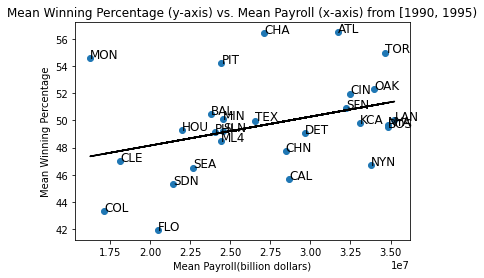

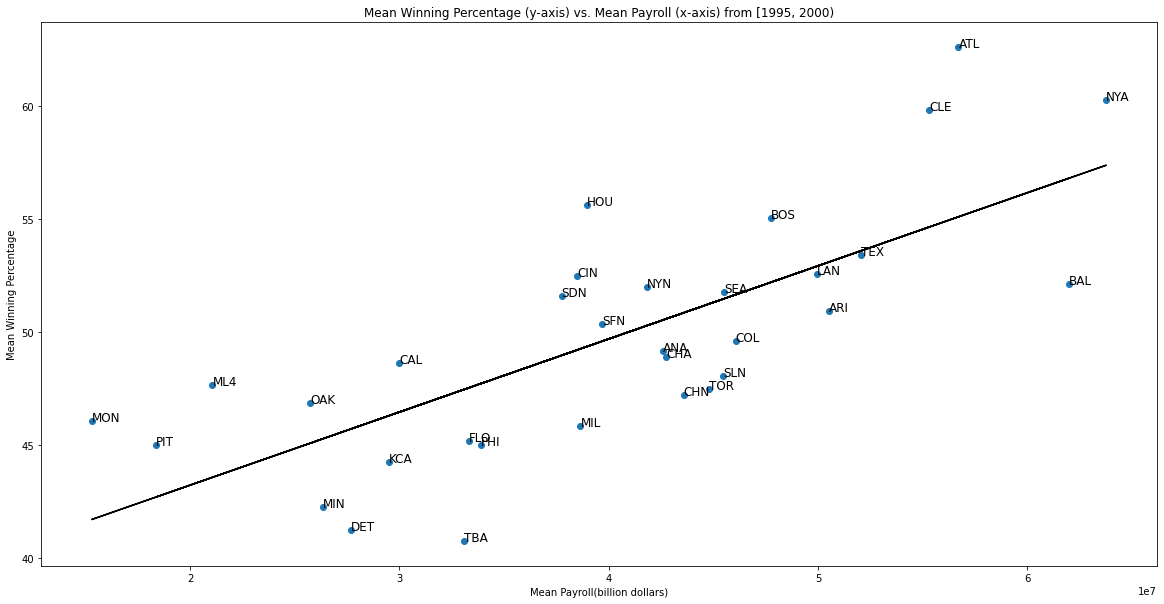

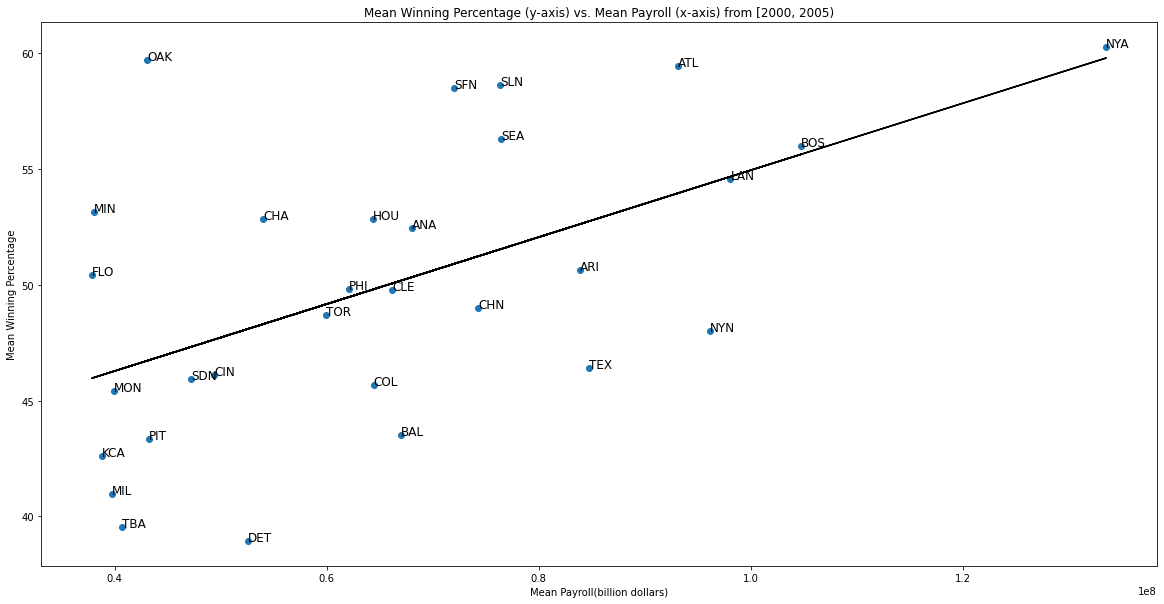

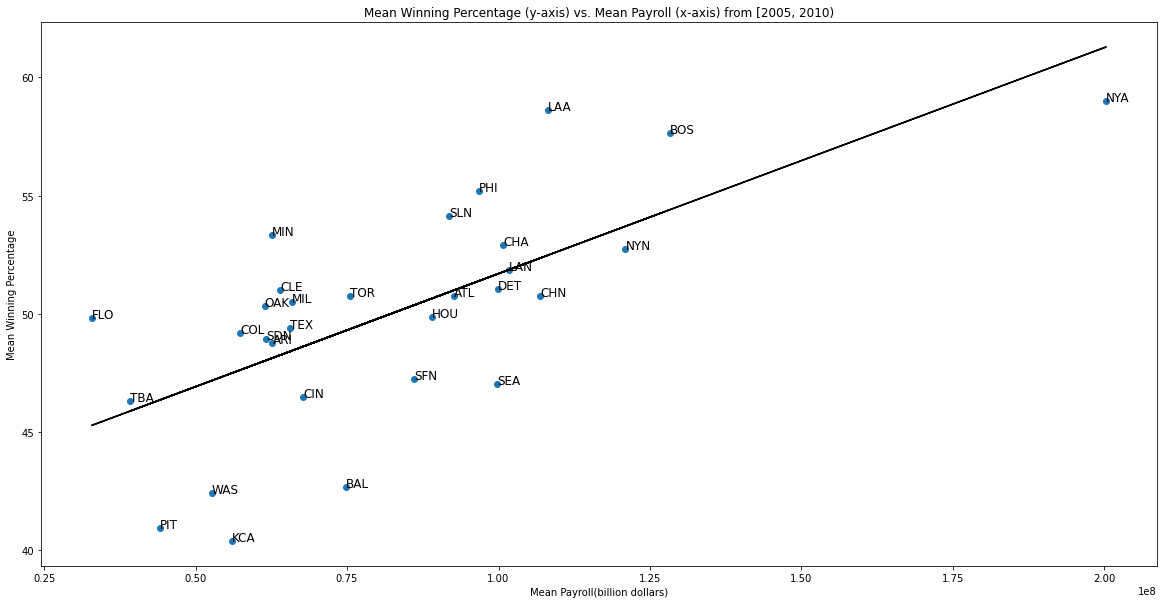

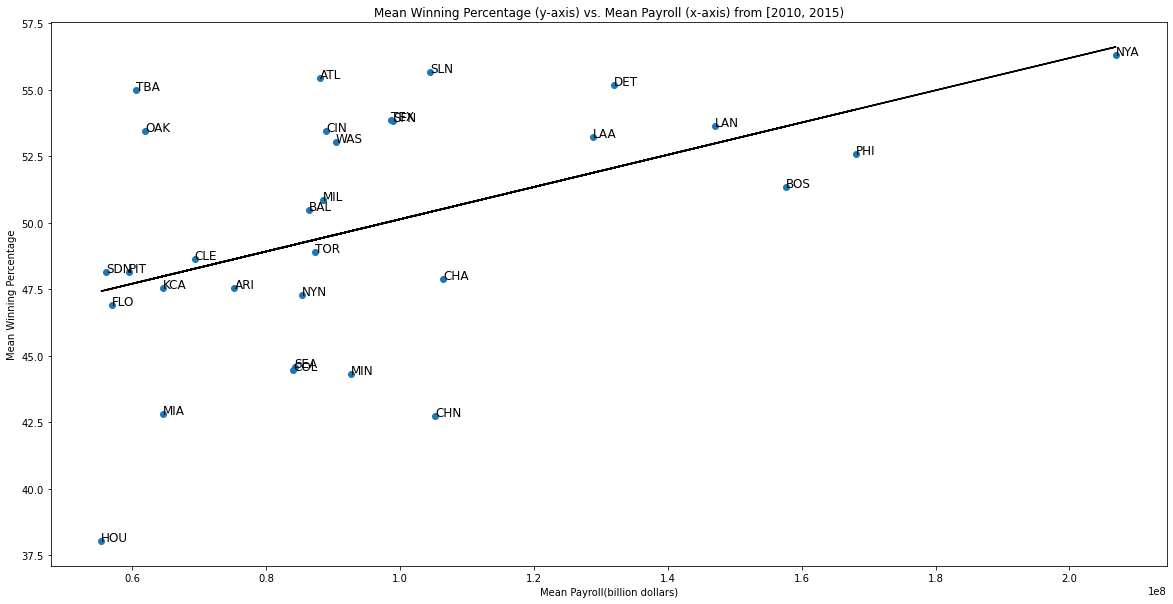

In [7]:
# divide year into different by 5 year in one group
years = [1990, 1995, 2000, 2005, 2010, 2015]
result_2014['years'] = pd.cut(result_2014['yearID'], bins = years, right=False)

# for each period, find the mean payroll + mean winning percentage for each team
for p, period in result_2014.groupby('years'):
    pay = []
    win = []
    teams = []
    
    # find the mean payroll and the mean winning percentage for each team in each period
    # and append it to related time period array
    for t, team in period.groupby('teamID'):
        pay.append(team['total_payroll'].mean())
        win.append(team['winning_percentage'].mean())
        teams.append(t)
        
    # create scatterplot for the correlation between mean payroll and mean winning percentage
    fig, ax = plt.subplots()
    plt.rcParams["figure.figsize"] = [20,10] # change the size of graph 
    ax.scatter(pay, win)
    
    # Specify the team name for each point on the graph
    for i, txt in enumerate(teams):
        ax.annotate(txt, (pay[i], win[i]), size = 12)
            
    # plot the corrlation line 
    x, m = polyfit(pay, win, 1)
    plt.plot(pay, np.multiply(m, pay) + x, c='black')
    
    # add the necessary label
    plt.title('Mean Winning Percentage (y-axis) vs. Mean Payroll (x-axis) from ' + str(p))
    plt.xlabel("Mean Payroll(billion dollars)")
    plt.ylabel("Mean Winning Percentage")
    
    plt.show()

# Question 2 
What can you say about team payrolls across these periods? Are there any teams that standout as being particularly good at paying for wins across these time periods? What can you say about the Oakland A's spending efficiency across these time periods (labeling points in the scatterplot can help interpretation).

The general trend is when the mean payroll goes up, the mean winning percentage will increase. The team that particularly good at paying for wins is NYA (have highest salaries for last 20 years) and BOS, but thir efficiency is trend to decreaes in recent year (their point are below the corrlation line in last graph).  
The OAK is opposite to the NYA team, it's efficiency is greater than NYA for all time period except 1995-2000. In general, OAK have really good efficieny on spend money. OAK has obtained a high winning percentage while they only spent very low salaries (compare to other team) in most time period (1995- 2014). And this is obvious on 2000 - 2005 (OAK spend really low salaries but received 2nd high winning percentage). In graph, I found that the points of OAK are always above the correction line over all period, which means OAK have a really good spending efficiency, and in period 2000 - 2005 and period 2010 - 2014, the gap between OAK point and correction line is huge, which means OAK have very high efficiency to spend money in that period. 

# Problem 5 
Create a new variable in your dataset that standardizes payroll conditioned on year. 
Create the new column that record the std payroll, and then use the formula given by README to calculate the std_payroll for each team by extract the (total payroll - average paroll)/std (we can do that by match the yearID and teamID) 

In [8]:
# for each period, find the mean payroll + mean winning percentage for each team
for p, period in result_2014.groupby('yearID'):
    
    # use std() to calculate the standard deviation payrolls in that period 
    std = period['total_payroll'].std() 
    # use mean() to calculate the mean payrolls in that period 
    average_payroll = period['total_payroll'].mean()
    
    # use the infromation from last loop, we can calculate the std_payroll by extract the team total payroll 
    # in that period (by match the yearID and teamID) - average payroll, and use this result divide the std payroll to get 
    # the std payroll for this team
    for t, team in period.groupby('teamID'):
        result_2014.loc[(result_2014['yearID']==p) & (result_2014['teamID']==t),'std_payroll'] = (team['total_payroll']
                                                                                                  - average_payroll) / std
        
result_2014

,teamID,yearID,total_payroll,franchID,wins,games,winning_percentage,years,std_payroll
0,ANA,1997,31135472.0,ANA,84,162,51.851852,"[1995, 2000)",-0.698639
1,ANA,1998,41281000.0,ANA,85,162,52.469136,"[1995, 2000)",-0.086369
2,ANA,1999,55388166.0,ANA,70,162,43.209877,"[1995, 2000)",0.271410
3,ANA,2000,51464167.0,ANA,82,162,50.617284,"[2000, 2005)",-0.190214
4,ANA,2001,47535167.0,ANA,75,162,46.296296,"[2000, 2005)",-0.721244
...,...,...,...,...,...,...,...,...,...
723,WAS,2010,61400000.0,WSN,69,162,42.592593,"[2010, 2015)",-0.769040
724,WAS,2011,63856928.0,WSN,80,161,49.689441,"[2010, 2015)",-0.709594
725,WAS,2012,80855143.0,WSN,98,162,60.493827,"[2010, 2015)",-0.459099
726,WAS,2013,113703270.0,WSN,86,162,53.086420,"[2010, 2015)",0.257062


# Problem 6
Repeat the same plots as Problem 4, but use this new standardized payroll variable.

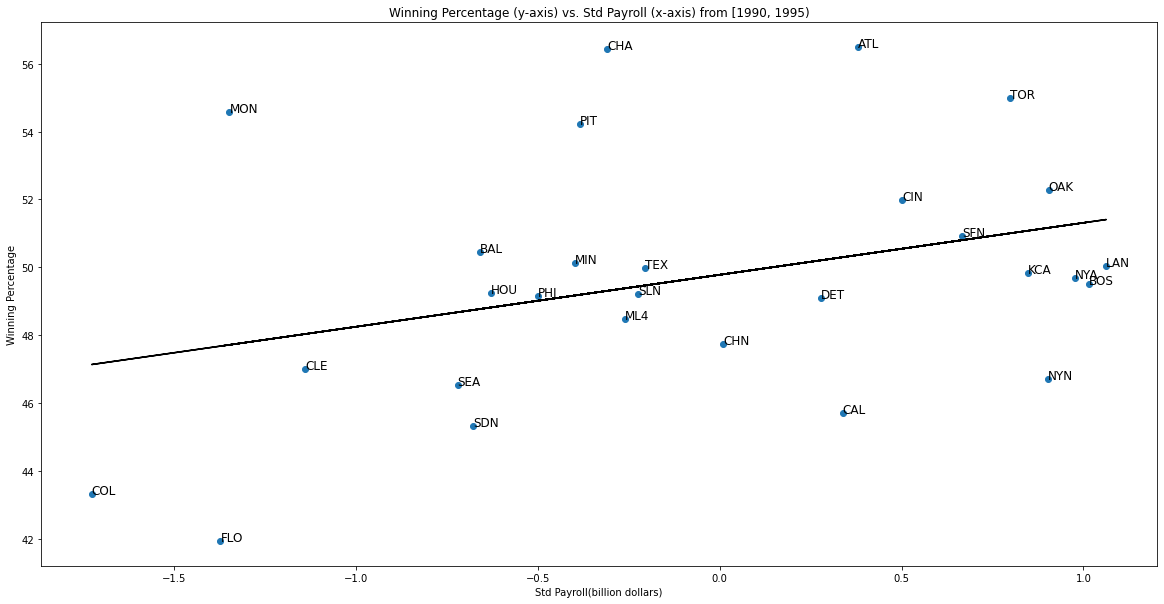

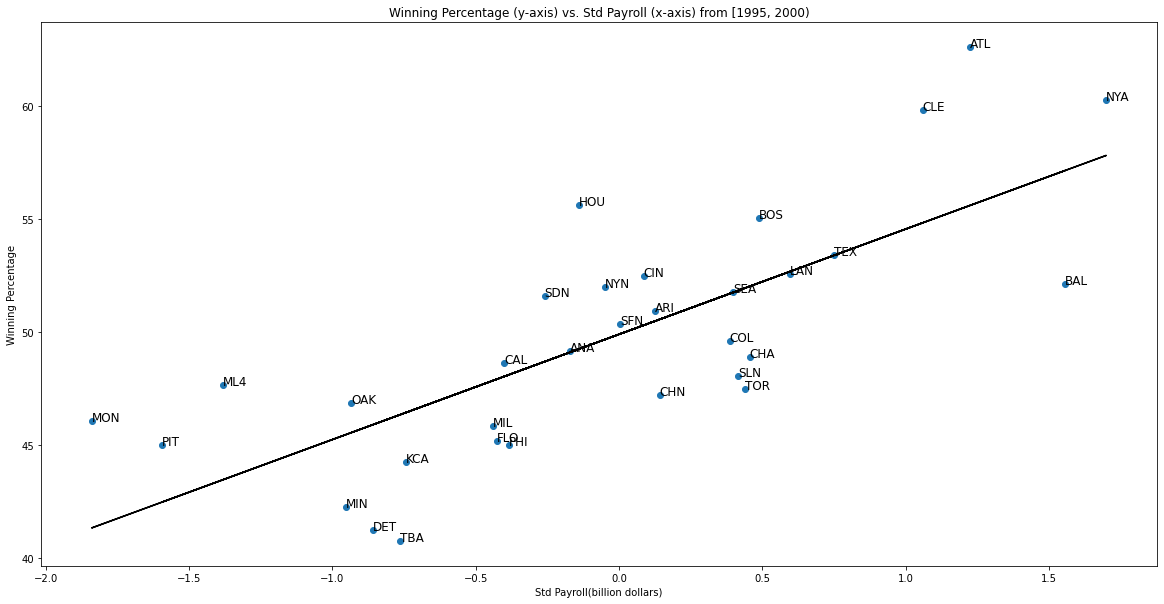

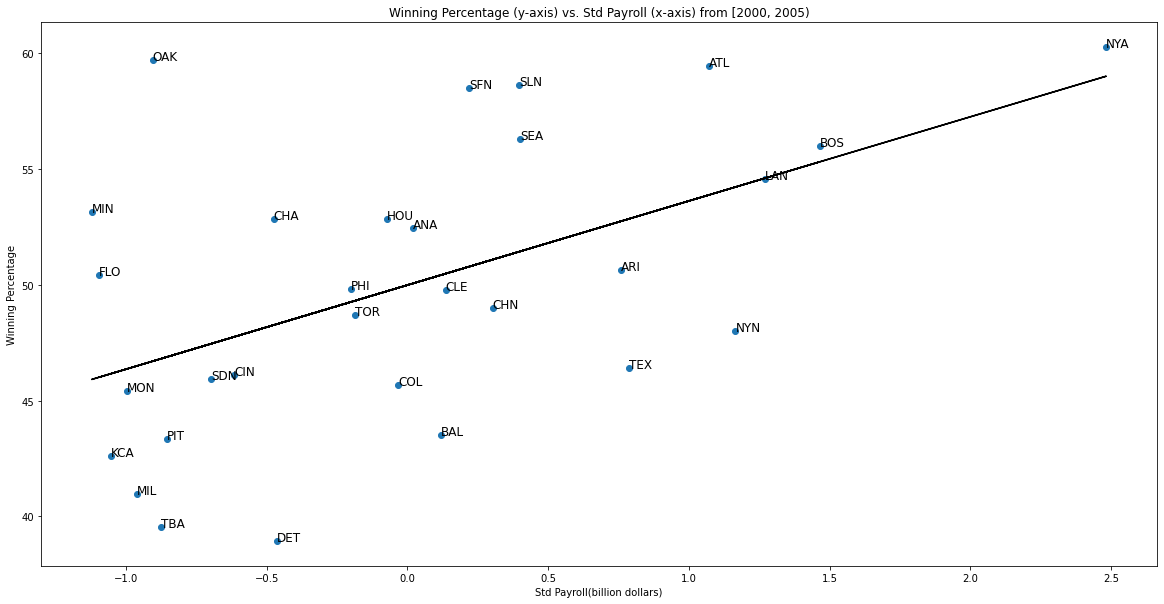

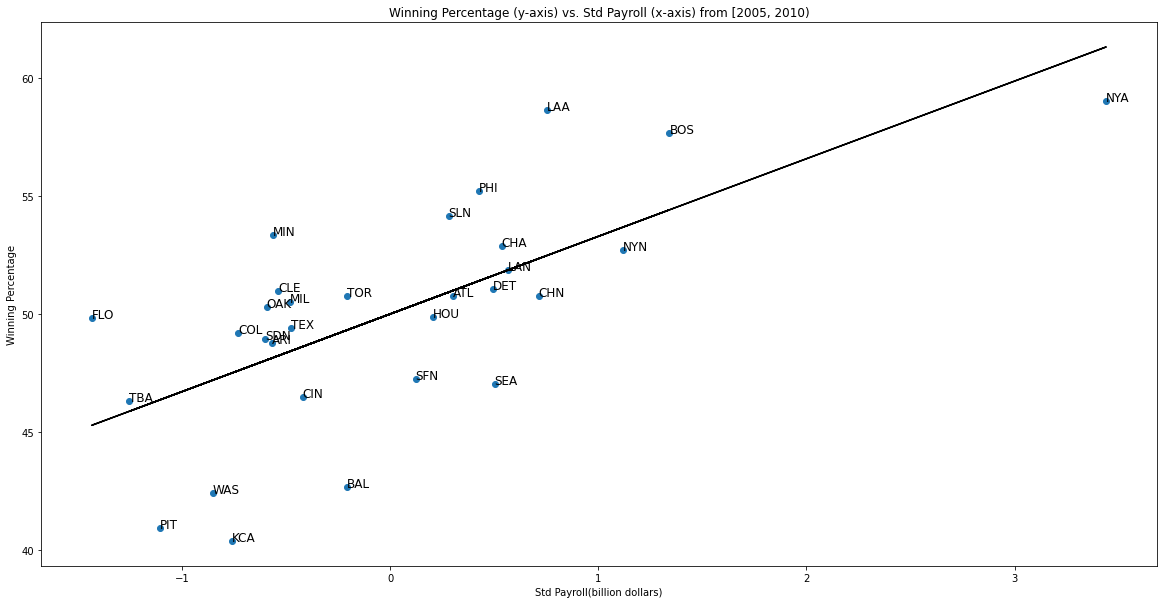

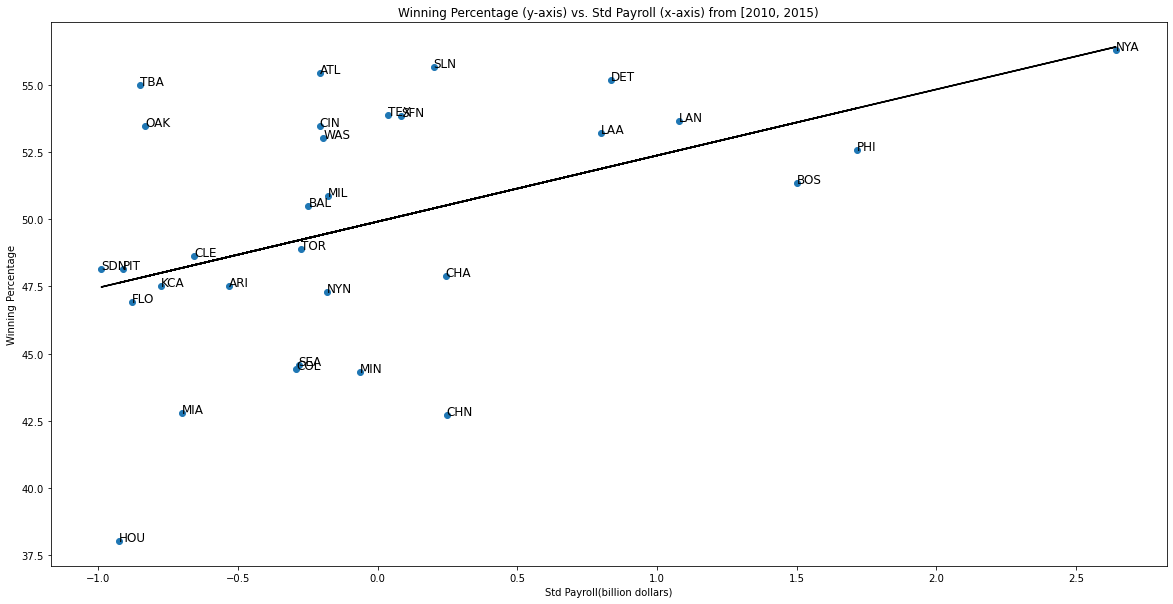

In [9]:
# for each period, find the std payroll + mean winning percentage for each team
for p, period in result_2014.groupby('years'):
    pay = []
    win = []
    teams = []
    
    # find the mean payroll and the std winning percentage for each team in each period
    # and append it to related time period array
    for t, team in period.groupby('teamID'):
        pay.append(team['std_payroll'].mean())
        win.append(team['winning_percentage'].mean())
        teams.append(t)
        
    # create scatterplot for the correlation between std payroll and winning percentage
    fig, ax = plt.subplots()
    plt.rcParams["figure.figsize"] = [20,10] # change the size of graph 
    ax.scatter(pay, win)
    
    # mark the team name for each point iin the graph
    for i, txt in enumerate(teams):
        ax.annotate(txt, (pay[i], win[i]), size = 12)
            
    # plot the corrlation line 
    x, m = polyfit(pay, win, 1)
    plt.plot(pay, np.multiply(m, pay) + x, c='black')
    
    # add the necessary label
    plt.title('Winning Percentage (y-axis) vs. Std Payroll (x-axis) from ' + str(p))
    plt.xlabel("Std Payroll(billion dollars)")
    plt.ylabel("Winning Percentage")
    
    plt.show()

# Question 3
Discuss how the plots from Problem 4 and Problem 6 reflect the transformation you did on the payroll variable.

Actually the graph in question 6 is very similar to the graph in question 4, that they have similar growth trend and scatters for each period time. most obvious difference between those 2 graph is the distribute of points in 2 graph. The graph in question 6 have more normalized distribution of data point than the graph in question 4. In problem 4, the x-axis are always positive number, but the graph on problem 6 have x-axis from range (-2, 3), which makes it easier to compare the scatterplots of different time periods. Standardizated data can help us to analyise how many std away from the average payroll. For example, if we see there is a positive std then it means the team payroll is greater than mean payroll, otherwise, if it is negetive, then the team payroll is less than the mean payroll. 

# Problem 7 
Make a single scatter plot of winning percentage (y-axis) vs. standardized payroll (x-axis). Add a regression line to highlight the relationship.

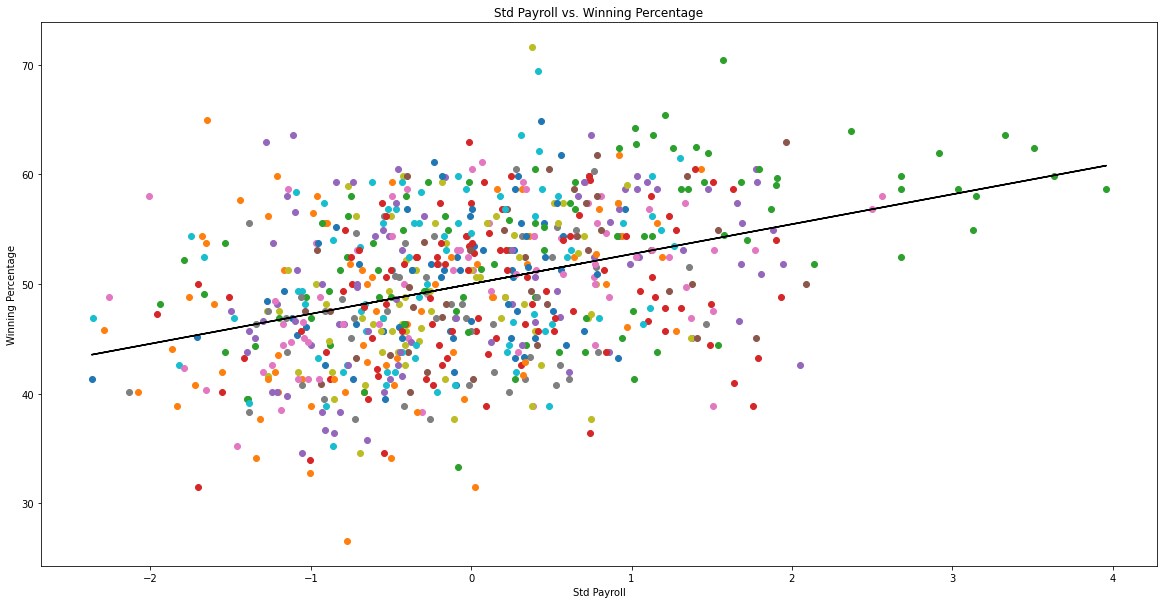

In [10]:
 # create scatterplot for the correlation between std payroll for each team and winning percentage
fig, ax = plt.subplots()
for t, team in result_2014.groupby('teamID'):
    ax.scatter(team['std_payroll'], team['winning_percentage'])
    
# plot the corrlation line 
x, m = polyfit(result_2014['std_payroll'], result_2014['winning_percentage'], 1)
plt.plot(result_2014['std_payroll'], np.multiply(m, result_2014['std_payroll']) + x, c = 'black')

# add the necessary label
plt.title( 'Std Payroll vs. Winning Percentage')
plt.xlabel('Std Payroll')
plt.ylabel('Winning Percentage')     

plt.show()

# Problem 8 
Create a new field to compute each team's spending effiency. Make a line plot with year on the x-axis and efficiency on the y-axis. A good set of teams to plot are Oakland, the New York Yankees, Boston, Atlanta and Tampa Bay (teamIDs OAK, BOS, NYA, ATL, TBA). For this, I can use 2 loop (1st loop for time period and 2nd loop for each team) and get each team's win percent & std payroll, and then use those information to calculate the effiency by formate. I will use those information to plot the graph for given set

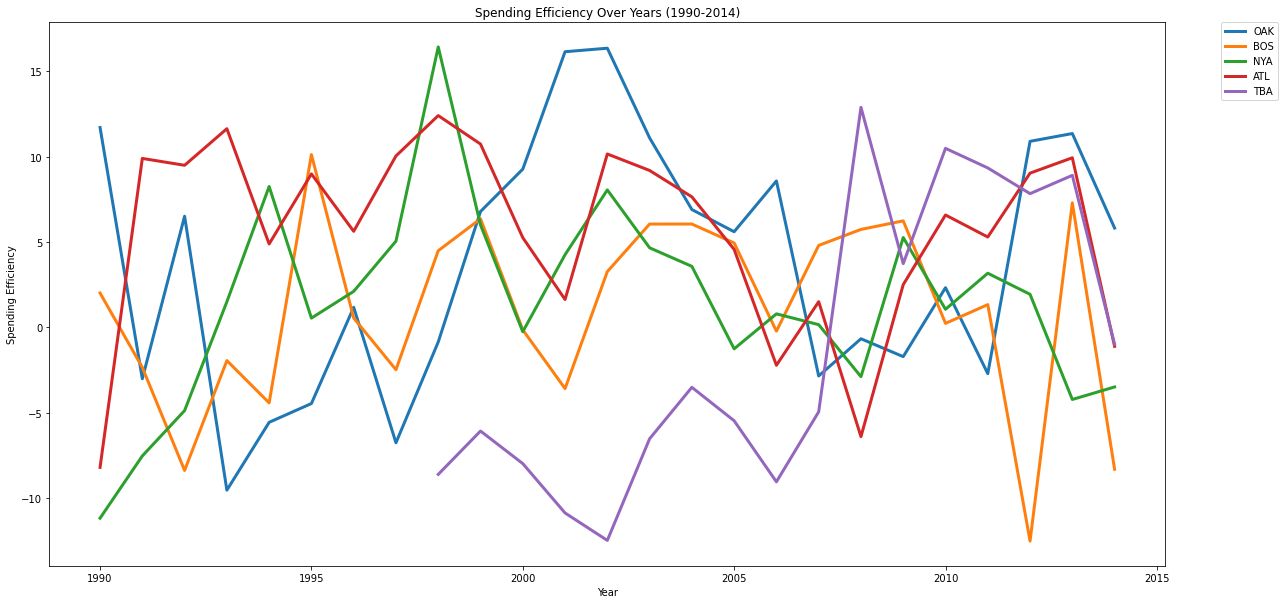

In [11]:
# for each period, find the std payroll and winning percentage for each team
for p, period in result_2014.groupby('yearID'):    
    
    # by the infromation from last loop, we can get the std_payroll and winning percentage by match the yearID and teamID 
    # and we can substitute those value into the formula that efficiency = (win percent - std payroll * 2.5 + 50)
    for t, team in period.groupby('teamID'):
        result_2014.loc[(result_2014['yearID'] == p) & (result_2014['teamID'] == t),'effiency'] = (
                                                            team['winning_percentage'] - (team['std_payroll'] * 2.5 + 50))

        
effiency = result_2014.pivot(index = 'yearID', columns = 'teamID', values = 'effiency')

# now we can make a line plot with year on the x-axis and efficiency on the y-axis by given set 
name = ['OAK','BOS','NYA','ATL','TBA']
for n in name:
    plt.plot(effiency[n], label=n, lw=3)
    plt.legend(n)

# add the necessary label
plt.title("Spending Efficiency Over Years (1990-2014)")
plt.xlabel("Year")
plt.ylabel("Spending Efficiency")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad = 0.)
plt.show()


# Question 4
What can you learn from this plot compared to the set of plots you looked at in Question 2 and 3? How good was Oakland's efficiency during the Moneyball period?

In the question 2 and 3, the graphs shows that the OAK have very high efficienct to spend money execpt period 1995-2000 the efficiency of OAK is greater than NYA in all period except period 1995-2000. Actually this is support by above graph. In that we can see the efficiency line of OAK is always above the efficiency line of NYA, except the period 1993-1999. Also we can see in period 2000-2005 and period 2010-2014, the efficiency line of OAK has high gap between 0, which mean in that 2 period the efficiency of OAK is very high, which is similar the graphs shows on quesion 2 and 3.From this plot, we learn that teams do not have to spend so much in order to win.